<a href="https://colab.research.google.com/github/zharfanw/zhongshan_dsp_python/blob/main/10_Transform_DomainSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Transform Domain System</h1>

# 1. Frequency Response



> Sinusoids are the <font color="blue">eigenfunctions</font> of LSI systems (<font color="orange">scaled</font>, not 'changed')

Knowing the <font color="orange">scaling</font> for every sinusoids with different frequency fully describes system behavior, its called <font color="red">frequency response</font>.
<br>
<font color="red">frequency response</font> describes how a system affects each pure frequency.


## Sinusoids as Eigenfunctions
A sinusoidal input $x[n]$ passes through an LTI system with impulse response
$h[n]$ to produce an output $y[n]$:
<center>
$
x[n] \to \left[ h[n] \right] \to y[n]
$
</center>
$y[n]$ is convolution between $x[n]$ and $h[n]$
<center>
$
y[n] = x[n] \circledast h[n] = \sum_{\forall m}^{} h[m] x[n-m]
$
</center>
<br>
if example complex sinusoidal input $x[n] = e^{j\omega_0 n}$, for $x[n-m]$ then
<center>
$x[n-m] = e^{j\omega_0 (n-m)}$
</center>
subtituting in convolution equation
<br>
<center>
$
y[n] = \sum_{m}h[m] e^{j\omega_0(n-m)}
$
</center>
<br>
Saparating Components
<br>
<center>
$
y[n] = \sum_{m} \underbrace{h[m] e^{-j\omega_0 m}}_{\color{orange}{H(e^{j\omega_0})}} \cdot \underbrace{e^{j\omega_0 n}}_{\color{green}{x[n]}}
$
</center>
<br>
Where:

*   $\color{orange}{H(e^{j\omega_0})}$ is the **frequency response** of the system at frequency $\omega_0$
*   $\color{green}{x[n]} = e^{j\omega_0 n}$ is the original sinusoidal input.

<br>
Then subtituting The frequency response $H(e^{j\omega_0})$ that written in polar form $H(e^{j\omega_0}) = |H(e^{j\omega_0})| e^{j\theta(\omega_0)}$ :
<center>
$
y[n] = \color{orange}{H(e^{j\omega_0})} \cdot \color{green}{x[n]} = \color{blue}{|H(e^{j\omega_0})|} \cdot e^{j(\omega_0n+\color{red}{\theta(\omega_0)})}
$
</center>


*   input sinusoid $x[n] = e^{j\omega_0 n}$ result output sinusoid $y[n] = |H(e^{j\omega_0})| \cdot e^{j(\omega_0n+\theta(\omega_0))}$ with same frequency $\omega_0$


* Output is sinusoid scaled by FT at $\omega_0$




So .
> If input x[n] is a complex sinusoid at $\omega_0$ then output of a system y[n] with <font color="orange">impulse response h[n]</font> is the <font color="green">same sinusoid</font> scaled by <font color="blue">$ |H(e^{j\omega_0})|$</font>  and phase-shifted by <font color="red">$arg\{H(e^{j\omega_0})\} = \theta(\omega_0)$</font> where <font color="orange">$ |H(e^{j\omega_0})| = DTFT\{h[n]\}$</font>

* <font color="blue">$ |H(e^{j\omega_0})|$</font> is Magnitude Response --> Gain
* <font color="red">$arg\{H(e^{j\omega_0})\} = \theta(\omega_0)$</font> is Phase Response --> Phase shift


Let We try Code it.

### Example When Input Complex Sinusoid

#### Explanation :

1.  **Impulse Response**: **h[n]** defines the system behavior in response to an impulse. It is chosen as [0.5,1.0,0.5], which represents a simple FIR filter.
2.  **Input Signal**: **x\[n\]** is a complex sinusoid defined as $e^{j\omega n}$, where $\omega = \pi/4$ radians/sample.
3.  **Convolution**:The output signal y[n] is calculated by convolving x[n] with h[n], which represents the system's response to the sinusoidal input.
4.  **Plotting**:The real and imaginary parts of both the input x[n] and output y[n] are plotted separately to observe the scaling and phase shift effects introduced by the system.

This code provides a visual representation of how an LTI system responds to a sinusoidal input, emphasizing the eigenfunction property of sinusoids in such systems.

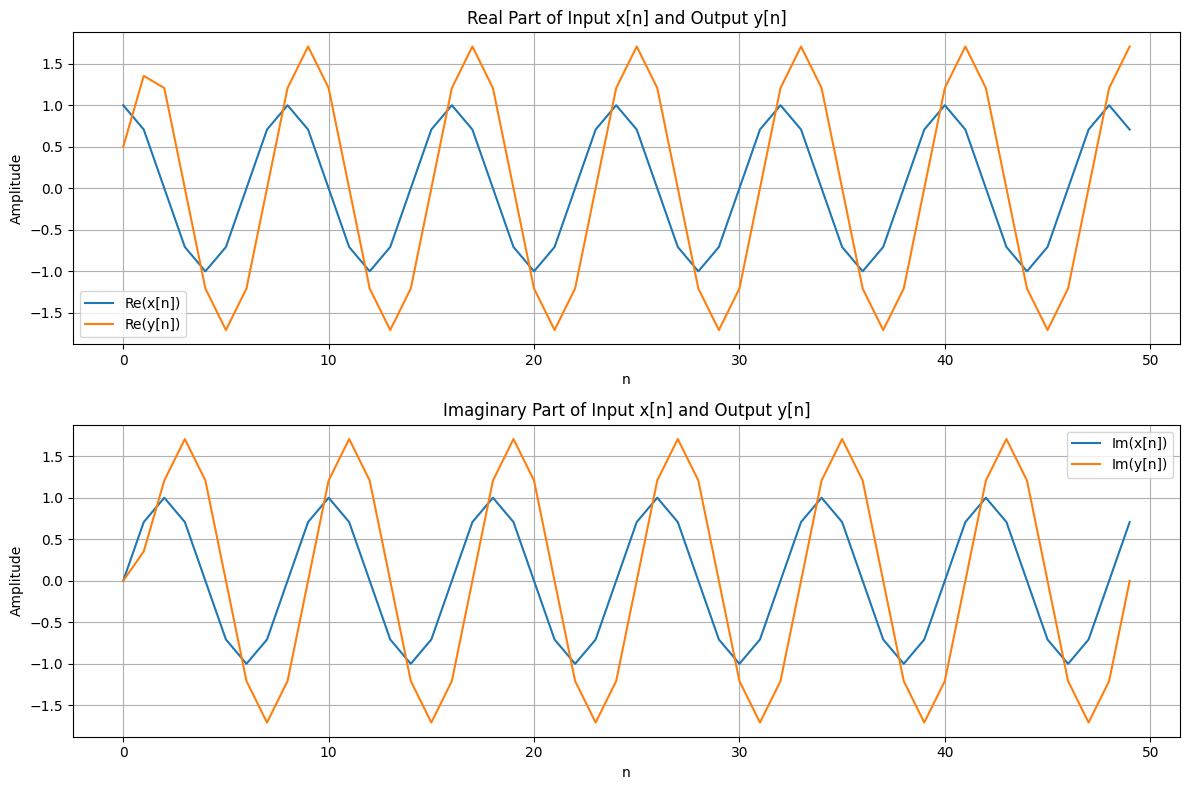

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define h[n]: the impulse response of the system
h = np.array([0.5, 1.0, 0.5])  # Example of a simple finite impulse response (FIR) filter

# Define the sinusoid frequency
omega = np.pi / 4  # Angular frequency in radians/sample

# Define the signal length
n = np.arange(0, 50)  # Discrete-time indices (50 samples)

# Define x[n]: the input signal
x = np.exp(1j * omega * n)  # Complex exponential sinusoid as the input

# Compute y[n]: the output signal using convolution of h[n] and x[n]
y = np.convolve(x, h, mode='full')[:len(n)]  # Convolve x[n] with h[n] and truncate to match length of n

# Plot the results
plt.figure(figsize=(12, 8))

# Plot the real part of the input and output
plt.subplot(2, 1, 1)
plt.plot(n, np.real(x), label="Re(x[n])")  # Real part of the input signal
plt.plot(n, np.real(y), label="Re(y[n])")  # Real part of the output signal
plt.title("Real Part of Input x[n] and Output y[n]")
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()

# Plot the imaginary part of the input and output
plt.subplot(2, 1, 2)
plt.plot(n, np.imag(x), label="Im(x[n])")  # Imaginary part of the input signal
plt.plot(n, np.imag(y), label="Im(y[n])")  # Imaginary part of the output signal
plt.title("Imaginary Part of Input x[n] and Output y[n]")
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


### Example With Real Sinusoids

#### Code Explanation:

1.  **Impulse Response**:$h[n]$ represents the system's behavior. In this case, it’s a simple FIR filter with values [0.5, 1.0, 0.5].
2.  **Input Signal**:$x[n] = 2\cos(\omega n + \theta)$, which is a real sinusoid with ; Amplitude = 2, Angular frequency: $\omega = \pi/4$, Phase shift: $\theta = \pi/4$
3.  **Output Signal**:y[n] is computed by convolving x[n] with the system’s impulse response h[n].

This illustrates the filtering effect of the impulse response h[n] on the input sinusoid x[n].

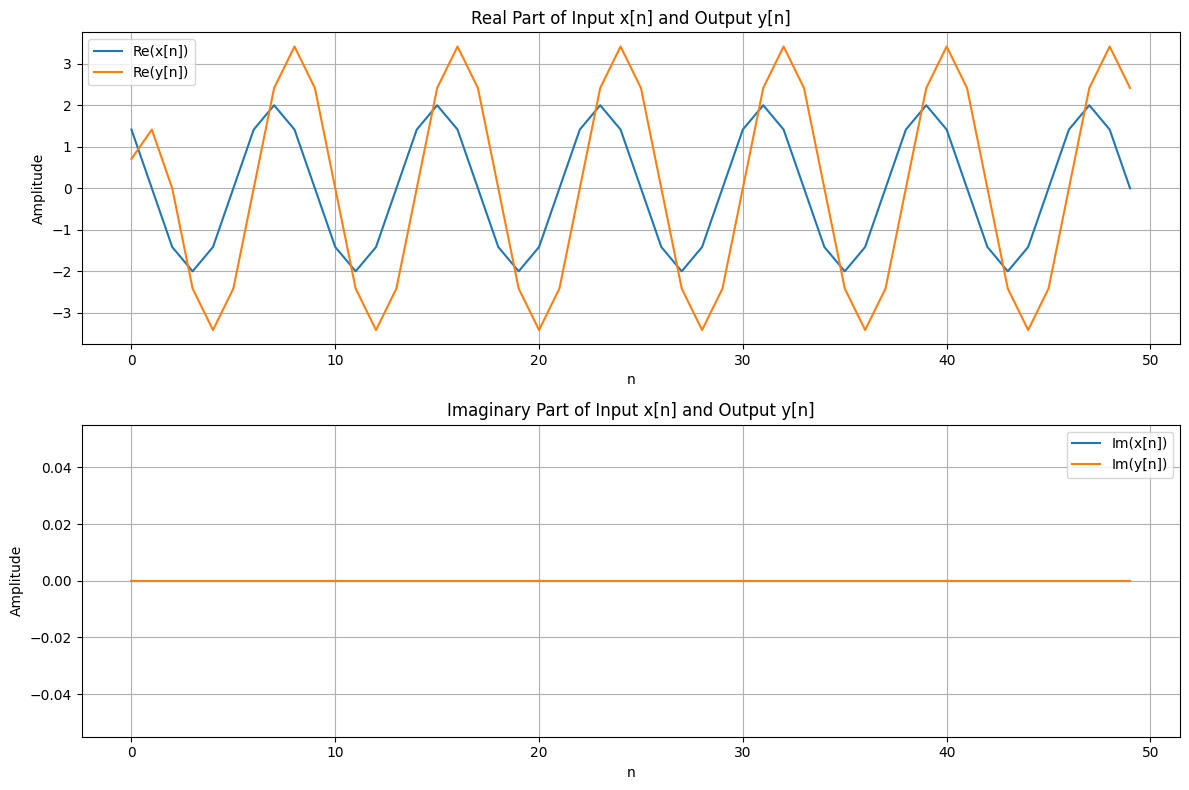

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define h[n]: the impulse response of the system
h = np.array([0.5, 1.0, 0.5])  # Example of a simple finite impulse response (FIR) filter

# Define the sinusoid's frequency and phase
omega = np.pi / 4  # Angular frequency in radians/sample
theta = np.pi / 4  # Phase angle in radians

# Define the signal length
n = np.arange(0, 50)  # Discrete-time indices (50 samples)

# Define x[n]: the input signal
x = 2 * np.cos(omega * n + theta)  # Real sinusoidal input with amplitude 2, frequency omega, and phase theta

# Compute y[n]: the output signal using convolution of h[n] and x[n]
y = np.convolve(x, h, mode='full')[:len(n)]  # Convolve x[n] with h[n] and truncate to match the length of n

# Plot the results
plt.figure(figsize=(12, 8))

# Plot the real part of the input and output
plt.subplot(2, 1, 1)
plt.plot(n, np.real(x), label="Re(x[n])")  # Real part of the input signal
plt.plot(n, np.real(y), label="Re(y[n])")  # Real part of the output signal
plt.title("Real Part of Input x[n] and Output y[n]")  # Title of the plot
plt.xlabel("n")  # Label for x-axis
plt.ylabel("Amplitude")  # Label for y-axis
plt.legend()  # Show legend
plt.grid()  # Show grid

# Plot the imaginary part of the input and output
plt.subplot(2, 1, 2)
plt.plot(n, np.imag(x), label="Im(x[n])")  # Imaginary part of the input signal
plt.plot(n, np.imag(y), label="Im(y[n])")  # Imaginary part of the output signal
plt.title("Imaginary Part of Input x[n] and Output y[n]")  # Title of the plot
plt.xlabel("n")  # Label for x-axis
plt.ylabel("Amplitude")  # Label for y-axis
plt.legend()  # Show legend
plt.grid()  # Show grid

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


### Example with Moving Average

Generate input signal
<br>
$x[n] = sin(0.1n) + 0.2 sin(1.5n)$

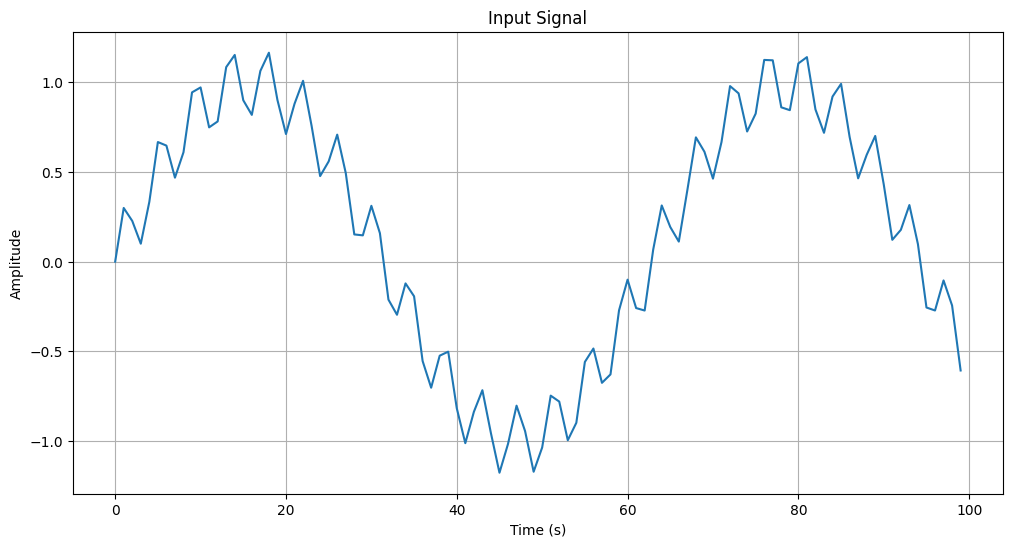

In [4]:
# Input signal parameters
# fs = 1  # Sampling frequency (adjust as needed)
n = np.arange(0, 100)  # Time vector

# Generate input signals
x1 = np.sin(0.1 * n)
x2 = 0.2 * np.sin(1.5 * n)
x = x1 + x2
# Plot input signal
plt.figure(figsize=(12, 6))
plt.plot(n, x)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Input Signal')
plt.grid(True)
plt.show()

Generate Moving Average Filter with Impulse Response, then convolute it with input Signal

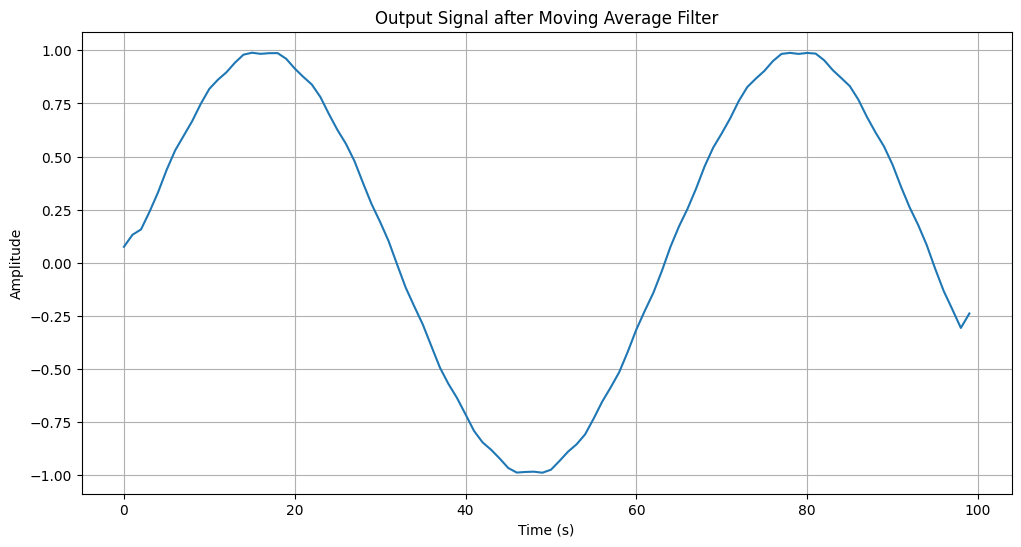

In [5]:
# Moving average filter
h = np.array([1/4, 1/4, 1/4, 1/4])

# Convolution
y = np.convolve(x, h, mode='same')

# Plot output signal
plt.figure(figsize=(12, 6))
plt.plot(n, y)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Output Signal after Moving Average Filter')
plt.grid(True)
plt.show()

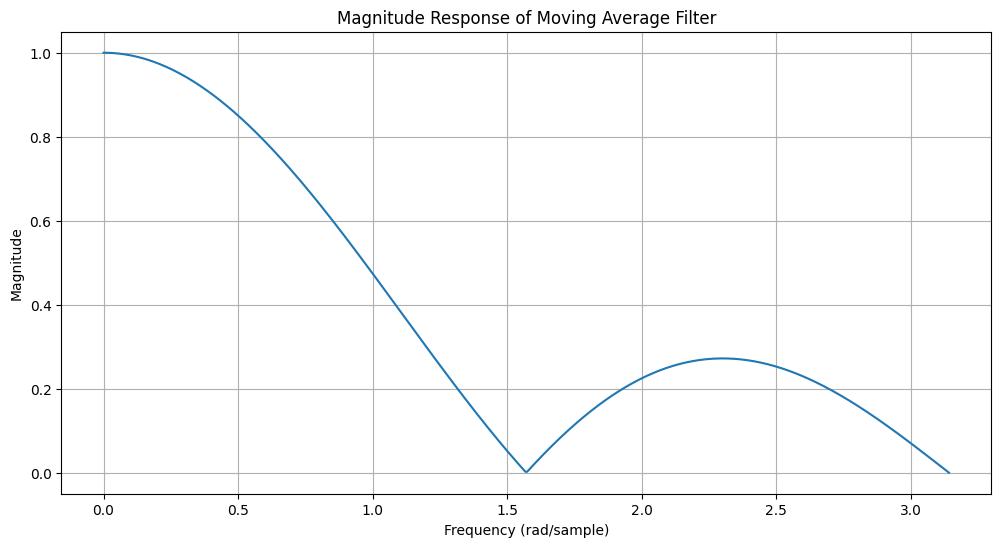

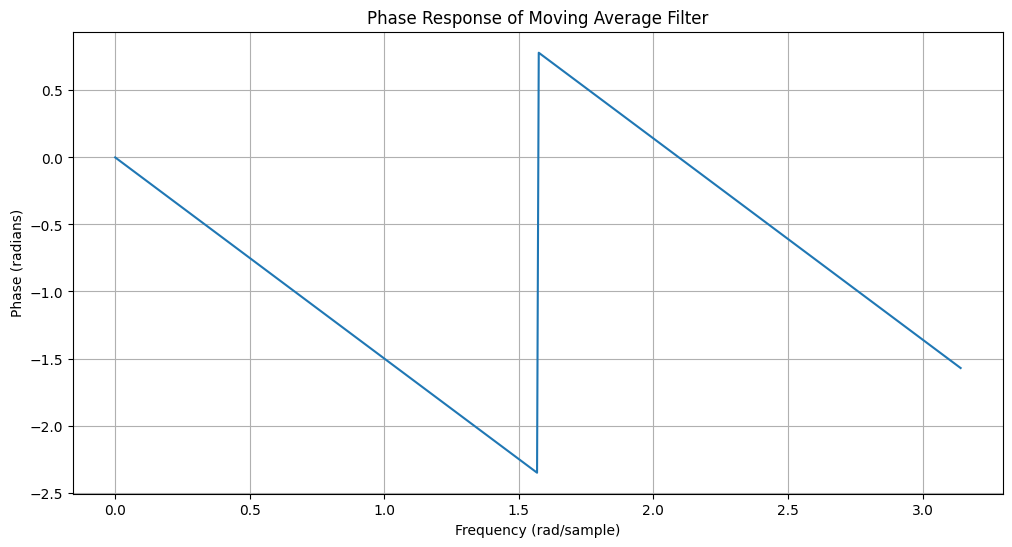

In [6]:
# Frequency response of the moving average filter
N = len(h)
omega = np.linspace(0, np.pi, 500)
H = np.zeros(len(omega), dtype=complex)

## DTFT H
for i in range(len(omega)):
  H[i] = np.sum(h * np.exp(-1j * omega[i] * np.arange(N)))

magnitude_response = np.abs(H)
phase_response = np.angle(H)

# Plot magnitude response
plt.figure(figsize=(12, 6))
plt.plot(omega, magnitude_response)
plt.xlabel('Frequency (rad/sample)')
plt.ylabel('Magnitude')
plt.title('Magnitude Response of Moving Average Filter')
plt.grid(True)
plt.show()

# Plot phase response
plt.figure(figsize=(12, 6))
plt.plot(omega, phase_response)
plt.xlabel('Frequency (rad/sample)')
plt.ylabel('Phase (radians)')
plt.title('Phase Response of Moving Average Filter')
plt.grid(True)
plt.show()

## Transient/Steady State

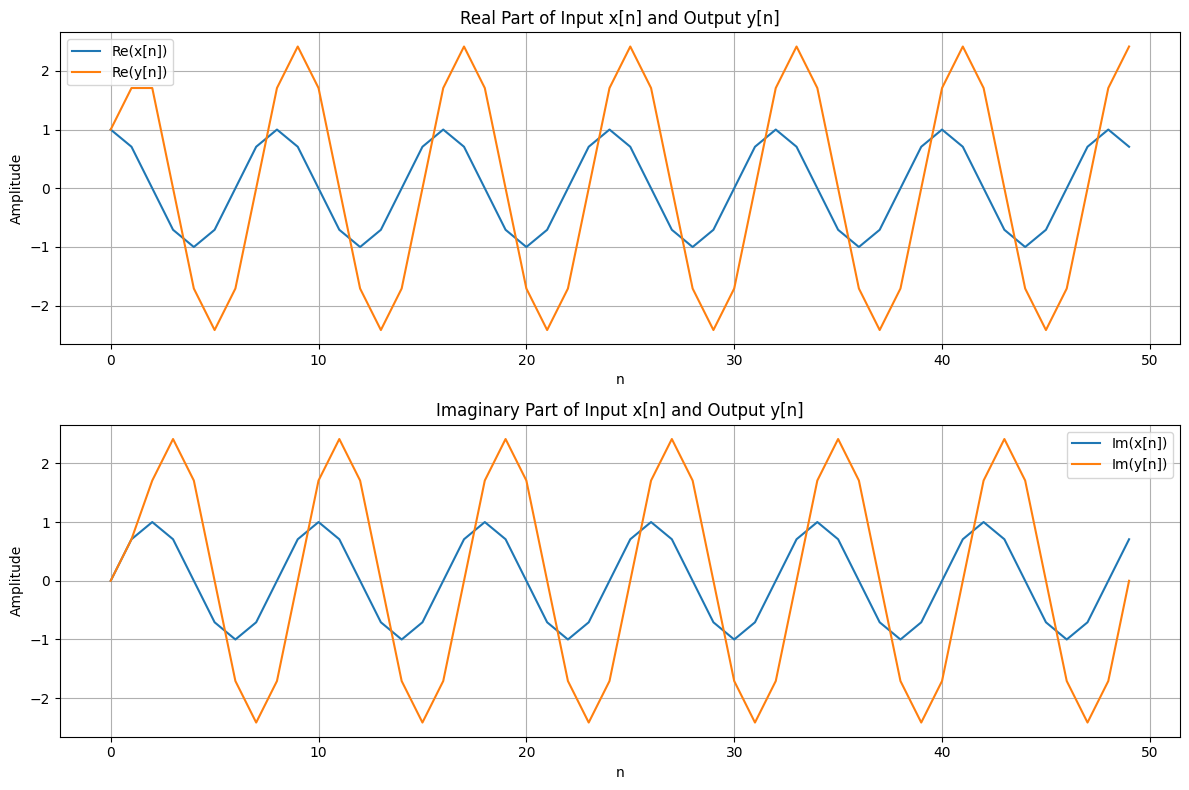

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Impulse response h[n]
h = np.array([1, 1, 1])  # Example: h[n] = [1, 1, 1]
L = len(h)  # Length of h[n]

# Input signal parameters
omega_0 = np.pi / 4  # Angular frequency in radians/sample
n = np.arange(0, 50)  # Time indices (0 to 49)

# Input signal: Complex sinusoid multiplied by unit step
x = np.exp(1j * omega_0 * n)  # e^(j*omega_0*n)

# Compute the output y[n]
y = np.zeros(len(n), dtype=complex)  # Initialize y[n] as complex array
for i in range(len(n)):
    # Perform summation for min(i, L-1)
    y[i] = np.exp(1j * omega_0 * i) * np.sum(h[:min(i, L-1) + 1] * np.exp(-1j * omega_0 * np.arange(min(i, L-1) + 1)))

# Plotting
plt.figure(figsize=(12, 8))

# Plot real part of x[n] and y[n]
plt.subplot(2, 1, 1)
plt.plot(n, np.real(x), label="Re(x[n])")
plt.plot(n, np.real(y), label="Re(y[n])")
plt.title("Real Part of Input x[n] and Output y[n]")
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()

# Plot imaginary part of x[n] and y[n]
plt.subplot(2, 1, 2)
plt.plot(n, np.imag(x), label="Im(x[n])")
plt.plot(n, np.imag(y), label="Im(y[n])")
plt.title("Imaginary Part of Input x[n] and Output y[n]")
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# 2. Transfer Function (TF)

## Relationship between LCCDE, Z Transform, and Frequency Response


### LCCDE
An LCCDE describes the input-output relationship of a discrete-time Linear Time-Invariant (LTI) system:
<br>
<center>
$
\sum_{k=0}^{N} \color{orange}{d_ky[n-k]} = \sum_{k=0}^{N} \color{green}{p_ky[n-k]}
$
</center>



### Z Transform
Reminding againg from this link
<center>
$
\sum_{k=0}^{N} \color{orange}{d_kz^{-k}Y(z)} = \sum_{k=0}^{N} \color{green}{p_kz^{-k}X(z)}
$
</center>
<br>
<center>
$
Y(z) = \frac{\sum_{k=0}^{N} p_kz^{-k}}{\sum_{k=0}^{N} d_kz^{-k}}X(z)
$
</center>
<br>
<center>
$
Y(z) = \color{red}{H(z)}X(z)
$
</center>
<br>
$H(z)$ is Transfer Function


### Frequency Response
The Frequency Response
$H(e^{j\omega})$ is obtained by evaluating the transfer function $H(z)$ on the unit circle ($z=e^{j\omega}$):
<center>
$
H(e^{j\omega})= \frac{p_0}{d_o} e^{j\omega(N-M)}\frac{\prod_{k=1}^{M} (e^{j\omega} - \zeta_k)}{\prod_{k=1}^{N} (e^{j\omega} - \lambda_k)}
$
</center>

*   $\zeta$: The **zeros** of the system, where $H(z) = 0$ (frequencies nullified).
*   $\lambda$​: The **poles** of the system, where $H(z) \to \infty$ (frequencies emphasized).
*   N: The order of the denominator (number of poles).
*   M: The order of the numerator (number of zeros).
*   $p_0​, d_0$​: Constants from the numerator and denominator of $H(z)$.
<hr>
<h4> Explanation about Frequency Response Equation</h4>
1.  **Unit Circle Evaluation**: Substituting $z = e^{j\omega}$, we convert $H(z)$ into a function of angular frequency $\omega$ (radians per sample).
2.  **Scaling Factor**:
  * $\frac{p_0}{d_0} e^{j\omega(N-M)}$:
        *   $\frac{p_0}{d_0}$​​: A constant scaling factor for the magnitude.
        *   $e^{j\omega(N-M)}$: Adds a phase shift proportional to the difference in pole-zero count.
3.  **Zeros Contribution**:
    
    *   $\prod_{k=1}^{M} (e^{j\omega} - \zeta_k)$:
        *   The product of distances from $e^{j\\omega}$ (current frequency) to the system zeros.
        *   Frequencies near zeros are attenuated.
4.  **Poles Contribution**:
    
    *   $\prod\_{k=1}^{N} (e^{j\\omega} - \\lambda\_k)$:
        *   The product of distances from $e^{j\\omega}$ to the system poles.
        *   Frequencies near poles are amplified.

### **Magnitude and Phase Response**
#### **Magnitude Response**
$H(e^{j\omega})$: The magnitude response shows how the amplitude of an input sinusoid is scaled by the system. It is computed as:
$
|H(e^{j\omega})| = \left|\frac{p_0}{d_0}\right| \cdot \left| \prod_{k=1}^{M} (e^{j\omega} - \zeta_k) \right| \Bigg/ \left| \prod_{k=1}^{N} (e^{j\omega} - \lambda_k) \right|
$.

1. Frequencies close to zeros ($\zeta_k$) result in smaller magnitude (attenuation).
2. Frequencies close to poles ($\lambda_k$​) result in larger magnitude (amplification).

#### **Phase Response**
$\angle H(e^{j\omega})$: The phase response shows the phase shift introduced by the system. It is computed as:

$\angle H(e^{j\omega}) = \text{Phase of } \frac{p_0}{d_0} + \omega(N - M) + \sum_{k=1}^{M} \angle(e^{j\omega} - \zeta_k) - \sum_{k=1}^{N} \angle(e^{j\omega} - \lambda_k)$

 1. **Zeros** contribute negative phase shifts as $e^{j\omega}$ approaches $\zeta_k$​.
 2. **Poles** contribute positive phase shifts as $e^{j\omega}$ approaches $\lambda_k$​.

 <hr>

#### **Physical Interpretation**
* **Low-Pass Systems**:
  * Poles are near $\omega = 0$, so low frequencies are amplified.
  * Zeros are near $\omega = \pi$, so high frequencies are attenuated.
* **High-Pass Systems**:
  * Zeros are near $\omega = 0$, so low frequencies are attenuated.
  * Poles are near $\omega = \pi$, so high frequencies are amplified.
* **Band-Pass Systems**:
  * Poles and zeros are strategically placed to amplify frequencies in a certain range while attenuating others.

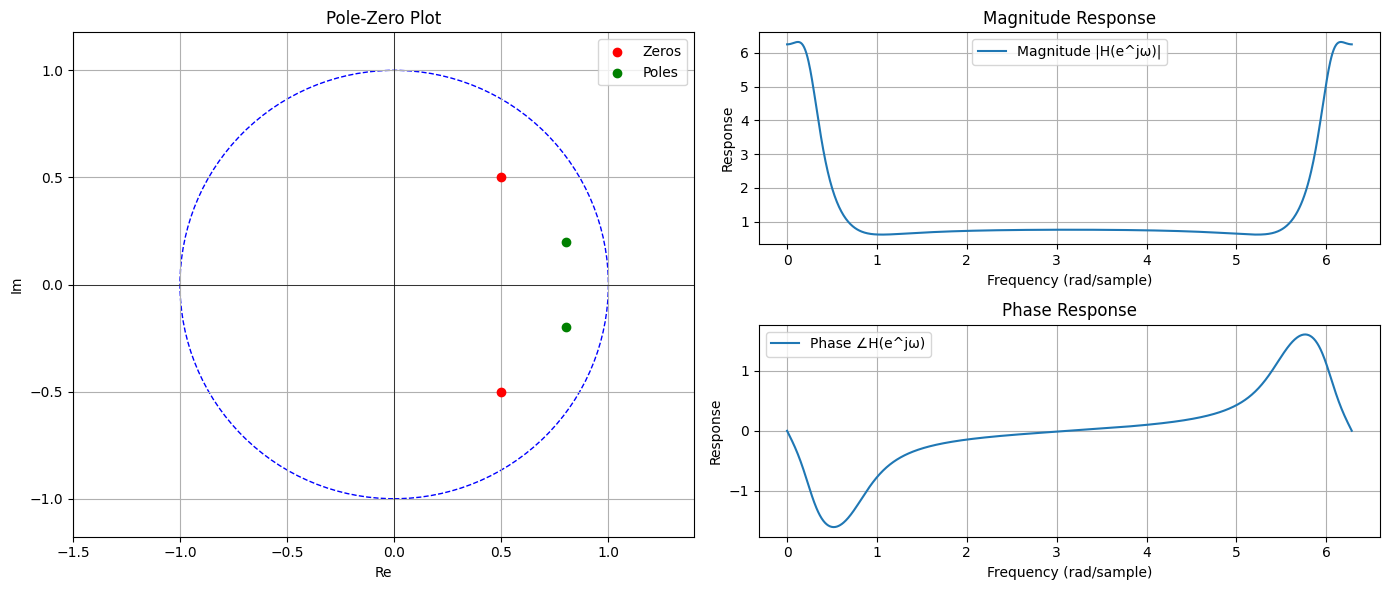

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define poles and zeros (example values)
zeros = [0.5 + 0.5j, 0.5 - 0.5j]  # Example zeros
poles = [0.8 + 0.2j, 0.8 - 0.2j]  # Example poles

# Frequency range (omega)
omega = np.linspace(0, 2 * np.pi, 1000)
ejw = np.exp(1j * omega)  # Points on the unit circle

# Compute frequency response
numerator = np.prod([ejw - z for z in zeros], axis=0)
denominator = np.prod([ejw - p for p in poles], axis=0)
H = numerator / denominator

# Magnitude and Phase
magnitude = np.abs(H)
phase = np.angle(H)

# Plot the poles, zeros, and unit circle
plt.figure(figsize=(14, 6))

# Subplot 1: Pole-Zero Plot
plt.subplot(1, 2, 1)
plt.xlim(-1, 1)
plt.ylim(-1.5, 1.5)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
circle = plt.Circle((0, 0), 1, color='blue', fill=False, linestyle='--')
plt.gca().add_artist(circle)

plt.scatter([z.real for z in zeros], [z.imag for z in zeros], color='red', label='Zeros', zorder=5)
plt.scatter([p.real for p in poles], [p.imag for p in poles], color='green', label='Poles', zorder=5)



plt.title("Pole-Zero Plot")
plt.xlabel("Re")
plt.ylabel("Im")
plt.axis('equal')
plt.xlim([-1.5,1.4])
plt.ylim([-1.5,1.5])
plt.legend()
plt.grid()

# Subplot 2: Frequency Response
plt.subplot(2, 2, 2)
plt.plot(omega, magnitude, label="Magnitude |H(e^jω)|")
plt.title("Magnitude Response")
plt.xlabel("Frequency (rad/sample)")
plt.ylabel("Response")
plt.legend()
plt.grid()

# Subplot 3: Frequency Response
plt.subplot(2, 2, 4)
plt.plot(omega, phase, label="Phase ∠H(e^jω)")
plt.title("Phase Response")
plt.xlabel("Frequency (rad/sample)")
plt.ylabel("Response")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


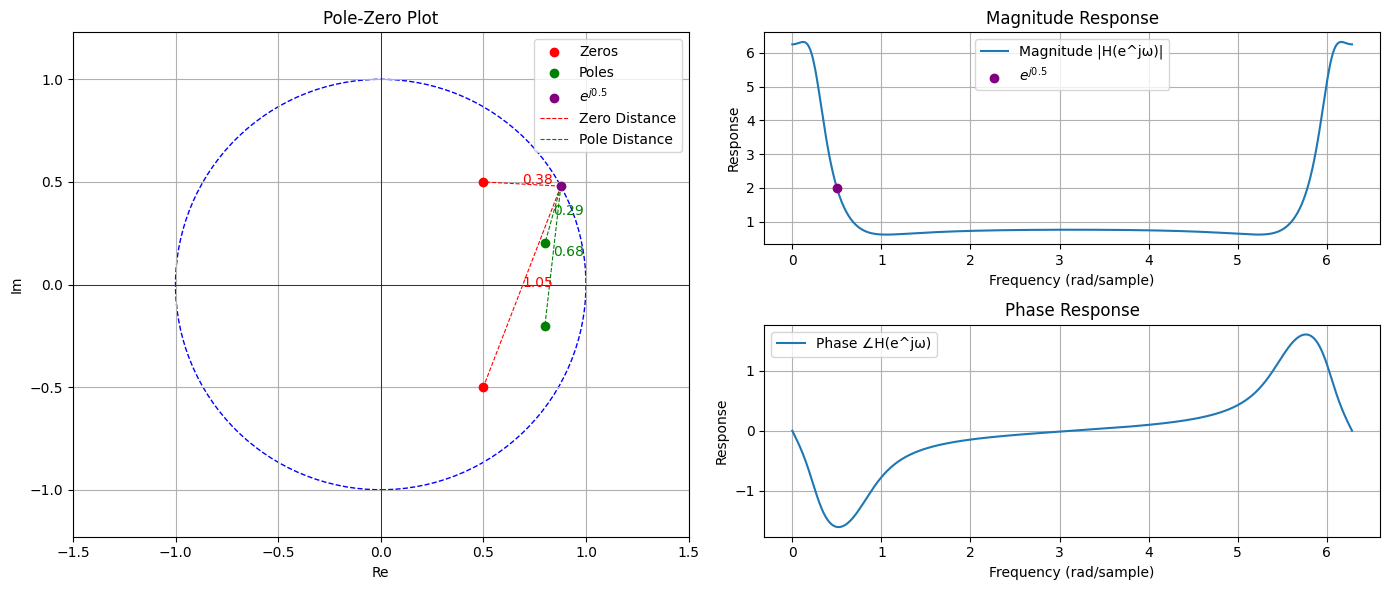

Distances to Zeros:
Zero 1: 0.38
Zero 2: 1.05

Distances to Poles:
Pole 1: 0.29
Pole 2: 0.68


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define poles and zeros (example values)
zeros = [0.5 + 0.5j, 0.5 - 0.5j]  # Example zeros
poles = [0.8 + 0.2j, 0.8 - 0.2j]  # Example poles

# Frequency range (omega)
omega = np.linspace(0, 2 * np.pi, 1000)
ejw = np.exp(1j * omega)  # Points on the unit circle

# Example point on the unit circle
sample_omega = 0.5
e_j0_2 = np.exp(1j * sample_omega)
H_e_j0_2 = np.abs(np.prod([e_j0_2 - z for z in zeros], axis=0) / np.prod([e_j0_2 - p for p in poles], axis=0))

# Compute distances from e^{j0.2} to poles and zeros
distances_to_zeros = [np.abs(e_j0_2 - z) for z in zeros]
distances_to_poles = [np.abs(e_j0_2 - p) for p in poles]

# Compute frequency response
numerator = np.prod([ejw - z for z in zeros], axis=0)
denominator = np.prod([ejw - p for p in poles], axis=0)
H = numerator / denominator

# Magnitude and Phase
magnitude = np.abs(H)
phase = np.angle(H)

# Plot the poles, zeros, and unit circle
plt.figure(figsize=(14, 6))

# Subplot 1: Pole-Zero Plot
plt.subplot(1, 2, 1)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
circle = plt.Circle((0, 0), 1, color='blue', fill=False, linestyle='--')
plt.gca().add_artist(circle)
plt.scatter([z.real for z in zeros], [z.imag for z in zeros], color='red', label='Zeros', zorder=5)
plt.scatter([p.real for p in poles], [p.imag for p in poles], color='green', label='Poles', zorder=5)
plt.scatter(e_j0_2.real, e_j0_2.imag, color='purple', label='$e^{j'+str(sample_omega)+'}$', zorder=6)

# Draw lines from e^{j0.2} to each pole and zero, and annotate distances
for i, z in enumerate(zeros):
    plt.plot([e_j0_2.real, z.real], [e_j0_2.imag, z.imag], 'r--', linewidth=0.8, label='Zero Distance' if i == 0 else None)
    plt.text((e_j0_2.real + z.real) / 2, (e_j0_2.imag + z.imag) / 2, f"{distances_to_zeros[i]:.2f}", color='red')
for i, p in enumerate(poles):
    plt.plot([e_j0_2.real, p.real], [e_j0_2.imag, p.imag], 'g--', linewidth=0.8, label='Pole Distance' if i == 0 else None)
    plt.text((e_j0_2.real + p.real) / 2, (e_j0_2.imag + p.imag) / 2, f"{distances_to_poles[i]:.2f}", color='green')

plt.title("Pole-Zero Plot")
plt.xlabel("Re")
plt.ylabel("Im")
plt.axis('equal')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.legend()
plt.grid()

# Subplot 2: Frequency Response
plt.subplot(2, 2, 2)
plt.plot(omega, magnitude, label="Magnitude |H(e^jω)|")
plt.scatter(sample_omega, H_e_j0_2, color='purple', label='$e^{j'+str(sample_omega)+'}$', zorder=6)
plt.title("Magnitude Response")
plt.xlabel("Frequency (rad/sample)")
plt.ylabel("Response")
plt.legend()
plt.grid()

# Subplot 3: Frequency Response
plt.subplot(2, 2, 4)
plt.plot(omega, phase, label="Phase ∠H(e^jω)")
plt.title("Phase Response")
plt.xlabel("Frequency (rad/sample)")
plt.ylabel("Response")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Print distances
print("Distances to Zeros:")
for i, d in enumerate(distances_to_zeros):
    print(f"Zero {i + 1}: {d:.2f}")

print("\nDistances to Poles:")
for i, d in enumerate(distances_to_poles):
    print(f"Pole {i + 1}: {d:.2f}")

<ipython-input-10-6d7a0f0077a2>:77: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  unit_circle_point.set_data(e_jw.real, e_jw.imag)
<ipython-input-10-6d7a0f0077a2>:89: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  response_point.set_data(omega, current_magnitude)


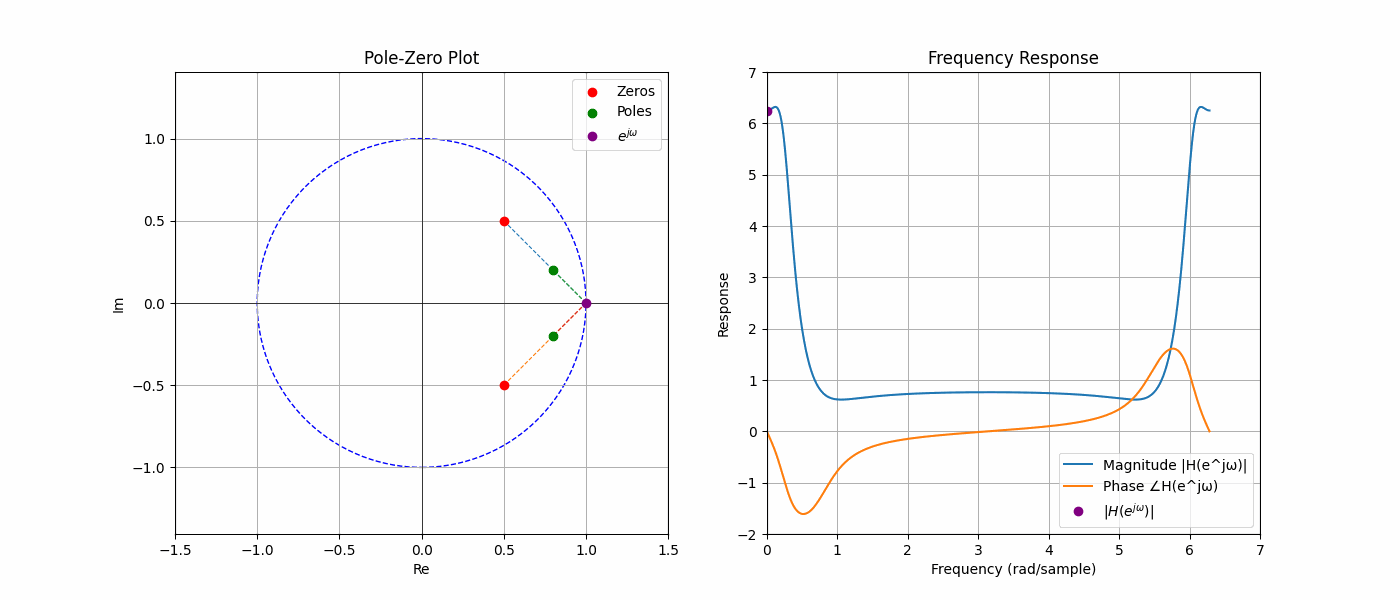

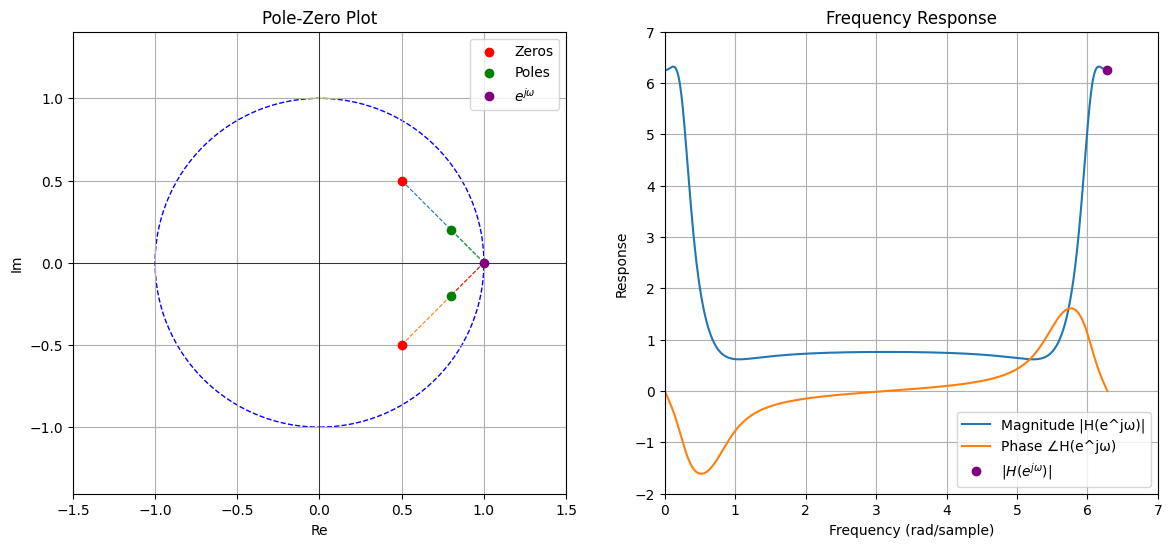

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import animation, rc
from IPython.display import HTML, Image # For GIF

# Define poles and zeros (example values)
zeros = [0.5 + 0.5j, 0.5 - 0.5j]  # Example zeros
poles = [0.8 + 0.2j, 0.8 - 0.2j]  # Example poles

# Frequency range (omega)
omega_vals = np.linspace(0, 2 * np.pi, 20)  # Animation range

# Create the figure
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Set up the pole-zero plot (left subplot)
ax[0].set_title("Pole-Zero Plot")
ax[0].set_xlabel("Re")
ax[0].set_ylabel("Im")
ax[0].axis('equal')
ax[0].set_xlim([-1.5, 1.5])
ax[0].set_ylim([-1.5, 1.5])
ax[0].grid()
ax[0].axhline(0, color='black', linewidth=0.5)
ax[0].axvline(0, color='black', linewidth=0.5)
circle = plt.Circle((0, 0), 1, color='blue', fill=False, linestyle='--')
ax[0].add_artist(circle)
zero_points = ax[0].scatter([z.real for z in zeros], [z.imag for z in zeros], color='red', label='Zeros', zorder=5)
pole_points = ax[0].scatter([p.real for p in poles], [p.imag for p in poles], color='green', label='Poles', zorder=5)
unit_circle_point, = ax[0].plot([], [], 'o', color='purple', label='$e^{j\omega}$', zorder=6)
lines = []
for _ in range(len(zeros) + len(poles)):
    lines.append(ax[0].plot([], [], '--', linewidth=0.8)[0])

ax[0].legend()

# Set up the frequency response plot (right subplot)
ax[1].set_title("Frequency Response")
ax[1].set_xlabel("Frequency (rad/sample)")
ax[1].set_ylabel("Response")
ax[1].set_xlim([0, 7])
ax[1].set_ylim([-2, 7])
ax[1].grid()
magnitude_line, = ax[1].plot([], [], label="Magnitude |H(e^jω)|")
phase_line, = ax[1].plot([], [], label="Phase ∠H(e^jω)")
response_point, = ax[1].plot([], [], 'o', color='purple', label="$|H(e^{j\omega})|$")
ax[1].legend()

# Initialize animation data
omega_freq_response = np.linspace(0, 2 * np.pi, 1000)
ejw_freq_response = np.exp(1j * omega_freq_response)
numerator = np.prod([ejw_freq_response - z for z in zeros], axis=0)
denominator = np.prod([ejw_freq_response - p for p in poles], axis=0)
H_freq_response = numerator / denominator
magnitude = np.abs(H_freq_response)
phase = np.angle(H_freq_response)

# Animation initialization function
def init():
    unit_circle_point.set_data([], [])
    magnitude_line.set_data([], [])
    phase_line.set_data([], [])
    response_point.set_data([], [])
    for line in lines:
        line.set_data([], [])
    return unit_circle_point, magnitude_line, phase_line, response_point, *lines

# Animation update function
def update(frame):
    omega = omega_vals[frame]
    e_jw = np.exp(1j * omega)
    distances_to_zeros = [np.abs(e_jw - z) for z in zeros]
    distances_to_poles = [np.abs(e_jw - p) for p in poles]

    # Update pole-zero plot
    unit_circle_point.set_data(e_jw.real, e_jw.imag)
    for i, z in enumerate(zeros):
        lines[i].set_data([e_jw.real, z.real], [e_jw.imag, z.imag])
    for i, p in enumerate(poles):
        lines[len(zeros) + i].set_data([e_jw.real, p.real], [e_jw.imag, p.imag])

    # Update frequency response plot
    magnitude_line.set_data(omega_freq_response, magnitude)
    phase_line.set_data(omega_freq_response, phase)

    # Highlight current frequency response point
    current_magnitude = np.abs(np.prod([e_jw - z for z in zeros]) / np.prod([e_jw - p for p in poles]))
    response_point.set_data(omega, current_magnitude)

    return unit_circle_point, magnitude_line, phase_line, response_point, *lines

# Create animation
ani = FuncAnimation(fig, update, frames=len(omega_vals), init_func=init, blit=True, interval=50)
# plt.tight_layout()
# plt.show()
# Save as GIF
ani.save('graphinterpretation.gif', writer='pillow', fps=60)
Image(open('graphinterpretation.gif','rb').read())

# 3. Phase Delay and Group Delay

<ipython-input-11-4e69dd9ab805>:13: RuntimeWarning: invalid value encountered in divide
  phase_delay = -phi / w


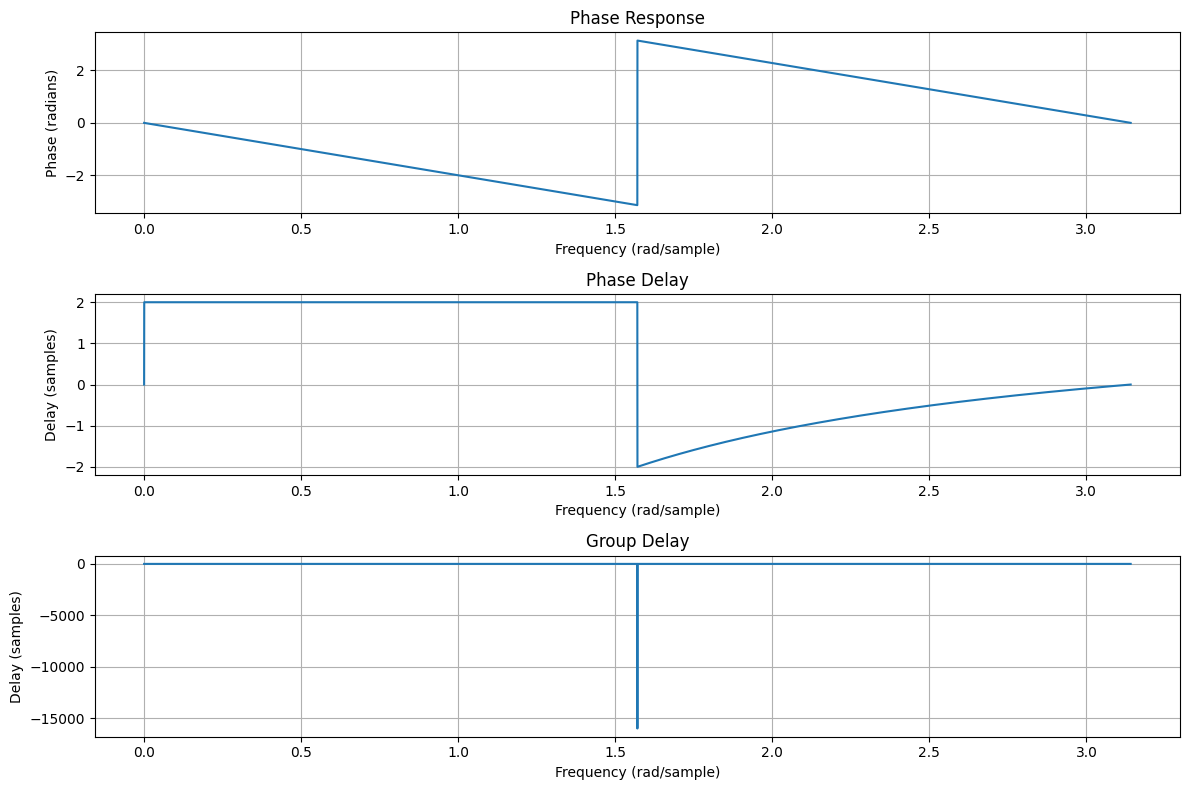

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Example filter (FIR filter design)
b = [0.1, 0.15, 0.5, 0.15, 0.1]  # FIR filter coefficients
w, h = freqz(b, worN=8000)       # Frequency response

# Phase response
phi = np.angle(h)

# Phase delay
phase_delay = -phi / w
phase_delay[w == 0] = 0  # Handle division by zero at DC

# Group delay
group_delay = -np.diff(phi) / np.diff(w)

# Plot results
plt.figure(figsize=(12, 8))

# Phase response
plt.subplot(3, 1, 1)
plt.plot(w, phi)
plt.title('Phase Response')
plt.xlabel('Frequency (rad/sample)')
plt.ylabel('Phase (radians)')
plt.grid()

# Phase delay
plt.subplot(3, 1, 2)
plt.plot(w, phase_delay)
plt.title('Phase Delay')
plt.xlabel('Frequency (rad/sample)')
plt.ylabel('Delay (samples)')
plt.grid()

# Group delay
plt.subplot(3, 1, 3)
plt.plot(w[:-1], group_delay)
plt.title('Group Delay')
plt.xlabel('Frequency (rad/sample)')
plt.ylabel('Delay (samples)')
plt.grid()

plt.tight_layout()
plt.show()


# Task
$
H(e^{j\omega}) = \left\{ \begin{array}{ l l }
    \left| H(e^{j0.1}) \right| \sim 1 \\
    \left| H(e^{j0.4}) \right| \sim 0 \\
  \end{array} \right.
$

